In [335]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

In [336]:
df_144p = pd.read_csv('Dataset_144p_Adjusted.csv')
df_360p = pd.read_csv('Dataset360p_Adjusted.csv')
df_1080p = pd.read_csv('Dataset1080p_Adjusted.csv')

C:\Users\IvoAg\AppData\Local\Temp\ipykernel_28628\4249610648.py:2: DtypeWarning: Columns (180) have mixed types. Specify dtype option on import or set low_memory=False.
  df_360p = pd.read_csv('Dataset360p_Adjusted.csv')
C:\Users\IvoAg\AppData\Local\Temp\ipykernel_28628\4249610648.py:3: DtypeWarning: Columns (17,73,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1080p = pd.read_csv('Dataset1080p_Adjusted.csv')


In [337]:
df_144p.head(5)

,Timestamp,Longitude,Latitude,Speed,Operatorname,Operator,CGI,Cellname,Node,CellID,...,NCellid18,NLAC18,NCell18,NARFCN18,NRxLev18,NQual18,NDistance18,NBearing18,Unnamed: 270,TimeDiff
0,2024-07-10 14:16:28,-38.553122,-3.786771,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-07-10 14:16:28,-38.553122,-3.786771,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
2,2024-07-10 14:17:25,-38.553122,-3.786771,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
3,2024-07-10 14:18:22,-38.553122,-3.786771,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
4,2024-07-10 14:19:19,-38.553122,-3.786771,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00


In [338]:
df_360p.head(5)

,Timestamp,Longitude,Latitude,Speed,Operatorname,Operator,CGI,Cellname,Node,CellID,...,NCellName18,NCellid18,NLAC18,NCell18,NARFCN18,NRxLev18,NQual18,NDistance18,NBearing18,Unnamed: 270
0,2024-07-11 22:53:36,-38.557393,-3.736021,0,TIM_85,72402,724023857200010,NaN,546523,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-07-11 22:53:37,-38.557393,-3.736021,0,TIM_85,72402,724023857200010,NaN,546523,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-07-11 22:53:38,-38.557393,-3.736021,0,TIM_85,72402,724023857200010,NaN,546523,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-07-11 22:53:39,-38.557393,-3.736021,0,TIM_85,72402,724023857200010,NaN,546523,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-07-11 22:53:40,-38.557393,-3.736021,0,TIM_85,72402,724023857200010,NaN,546523,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
df_1080p.head(5)

,Timestamp,Longitude,Latitude,Speed,Operatorname,Operator,CGI,Cellname,Node,CellID,...,NCellName18,NCellid18,NLAC18,NCell18,NARFCN18,NRxLev18,NQual18,NDistance18,NBearing18,Unnamed: 270
0,2024-07-12 09:05:07,-38.557438,-3.736018,0,TIMBRASIL,72402,724023857200010,NaN,546523,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-07-12 09:05:08,-38.557438,-3.736018,0,TIMBRASIL,72402,724023857200010,NaN,546523,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-07-12 09:05:09,-38.557438,-3.736018,0,TIMBRASIL,72402,724023857200010,NaN,546523,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-07-12 09:05:10,-38.557438,-3.736018,0,TIMBRASIL,72402,724023857200010,NaN,546523,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-07-12 09:05:11,-38.557449,-3.735926,0,TIMBRASIL,72402,724023857200010,NaN,546523,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
def replace_zeros_with_mean(df):
   
    # Ensure DL_bitrate and UL_bitrate are numeric
    df['DL_bitrate'] = pd.to_numeric(df['DL_bitrate'], errors='coerce')
    df['UL_bitrate'] = pd.to_numeric(df['UL_bitrate'], errors='coerce')
    
    # Calculate means
    dl_mean = df['DL_bitrate'][df['DL_bitrate'] != 0].mean()
    ul_mean = df['UL_bitrate'][df['UL_bitrate'] != 0].mean()
    
    # Replace zeros with means
    df['DL_bitrate'] = df['DL_bitrate'].replace(0, dl_mean)
    df['UL_bitrate'] = df['UL_bitrate'].replace(0, ul_mean)
    return df

In [341]:
def fill_na_with_median(df, column):
    median = df[column].median()
    df[column].fillna(median, inplace=True)
    return df

In [342]:
def plot_dl_bitrate_vs_timestamp(df, title_suffix):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df['DL_bitrate'], marker='o', linestyle='-')
    plt.xlabel('Timestamp')
    plt.ylabel('DL_bitrate')
    plt.title(f'DL_bitrate vs. Timestamp ({title_suffix})')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.xticks(df['Timestamp'][::len(df)//10])  # Reduce the number of x-axis labels
    plt.tight_layout()
    plt.show()

In [343]:
def plot_ul_bitrate_vs_timestamp(df, title_suffix):
    
    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df['UL_bitrate'], marker='o', linestyle='-')
    plt.xlabel('Timestamp')
    plt.ylabel('UL_bitrate')
    plt.title(f'UL_bitrate vs. Timestamp ({title_suffix})')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.xticks(df['Timestamp'][::len(df)//10])  # Reduce the number of x-axis labels
    plt.tight_layout()
    plt.show()

In [344]:
def remove_outliers(df, column):
   
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [345]:
def preprocess_bitrate(df, column):
    df = fill_na_with_median(df, column)
    df = remove_outliers(df, column)
    return df

In [346]:
# df_144p_filtered = preprocess_bitrate(df_144p, 'DL_bitrate')
# df_360p_filtered = preprocess_bitrate(df_360p, 'DL_bitrate')
# df_1080p_filtered = preprocess_bitrate(df_1080p, 'DL_bitrate')

In [347]:
df_144p_filtered = replace_zeros_with_mean(df_144p)
df_360p_filtered = replace_zeros_with_mean(df_360p)
df_1080p_filtered = replace_zeros_with_mean(df_1080p)

### Plot das Relação de Timestamp e Dowload

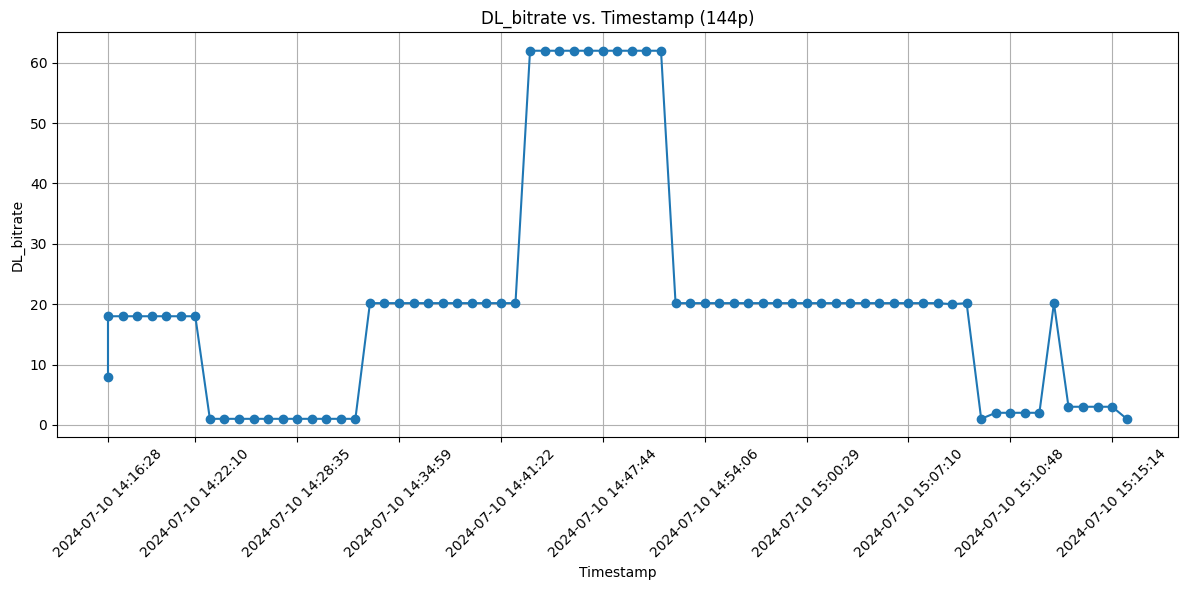

In [348]:
plot_dl_bitrate_vs_timestamp(df_144p, "144p")

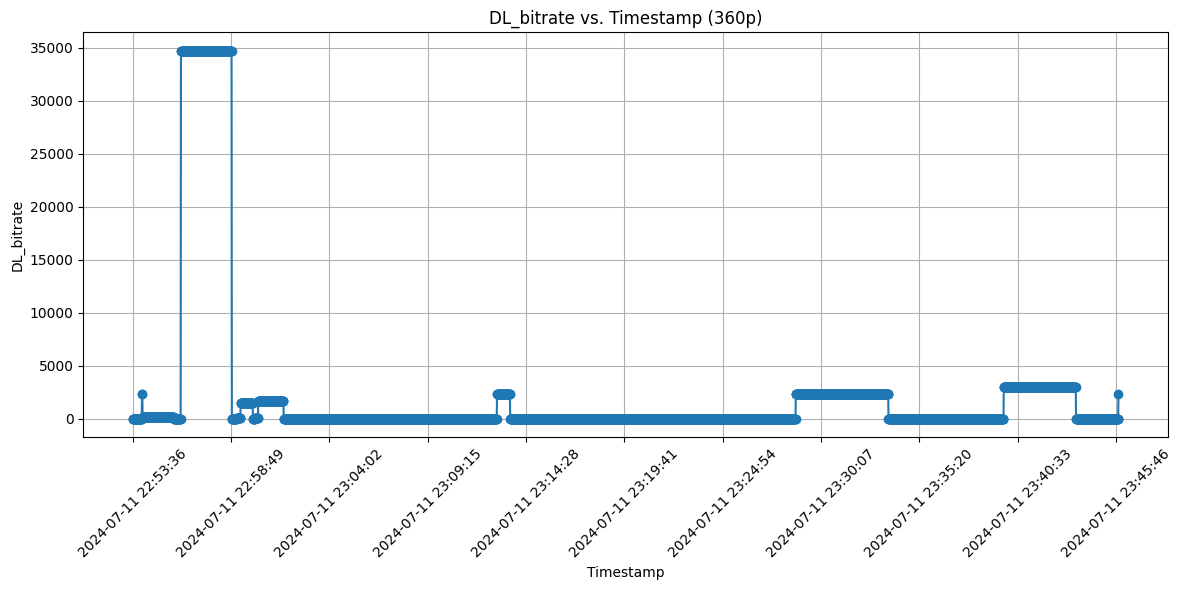

In [349]:
plot_dl_bitrate_vs_timestamp(df_360p, "360p")

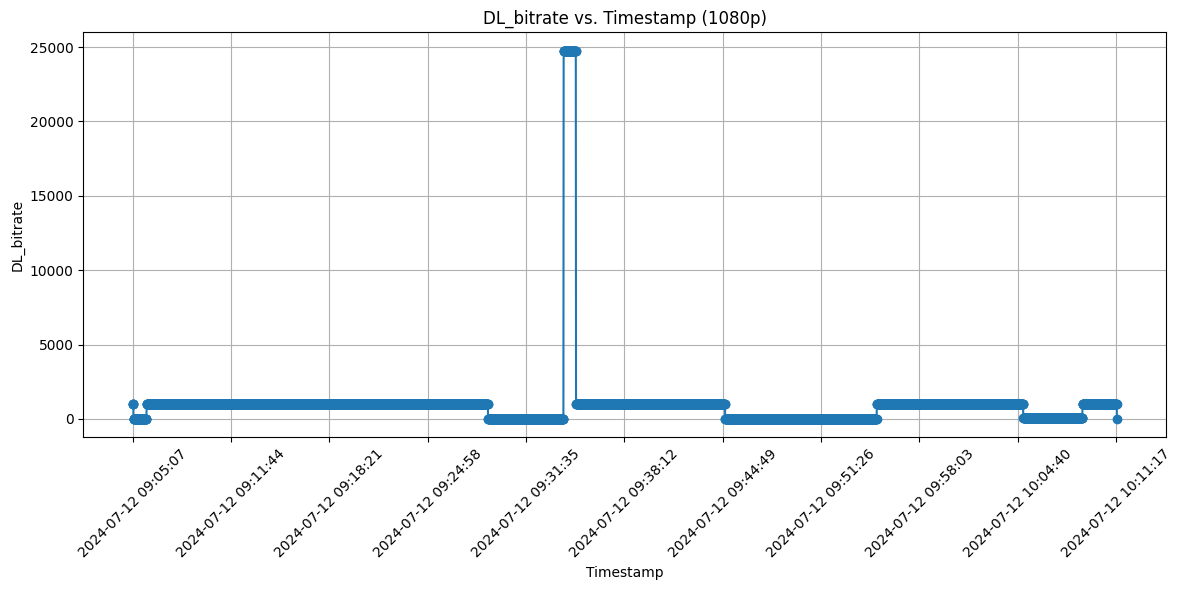

In [350]:
plot_dl_bitrate_vs_timestamp(df_1080p, "1080p")

### Decompostion in time series 

In [351]:
df_144p_filtered

,Timestamp,Longitude,Latitude,Speed,Operatorname,Operator,CGI,Cellname,Node,CellID,...,NCellid18,NLAC18,NCell18,NARFCN18,NRxLev18,NQual18,NDistance18,NBearing18,Unnamed: 270,TimeDiff
0,2024-07-10 14:16:28,-38.553122,-3.786771,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-07-10 14:16:28,-38.553122,-3.786771,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
2,2024-07-10 14:17:25,-38.553122,-3.786771,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
3,2024-07-10 14:18:22,-38.553122,-3.786771,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
4,2024-07-10 14:19:19,-38.553122,-3.786771,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024-07-10 15:12:30,-38.553128,-3.786754,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:01
68,2024-07-10 15:13:25,-38.553128,-3.786754,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:01
69,2024-07-10 15:14:20,-38.553128,-3.786754,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:01
70,2024-07-10 15:15:14,-38.553128,-3.786754,0,TIMBRASIL,72402,724023855300161,NaN,546369,161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:01


In [352]:
def decompose_time_series(df, column, title_suffix, period):
    """
    This function decomposes a time series into trend, seasonal, and residual components.
    
    Args:
    df (pd.DataFrame): Input DataFrame with 'Timestamp' and the column to be decomposed.
    column (str): The name of the column to be decomposed (e.g., 'DL_bitrate').
    title_suffix (str): Suffix for the plot titles to distinguish different datasets.
    period (int): The period of the seasonal component.
    
    Returns:
    result (DecomposeResult): The result of the seasonal decomposition.
    """
    if df is None or df.empty:
        raise ValueError("The DataFrame is empty or not loaded correctly.")
    
    if 'Timestamp' not in df.columns:
        raise KeyError("The 'Timestamp' column is not in the DataFrame.")
    
    # Fazer uma cópia do DataFrame para não alterar o original
    df_copy = df.copy()
    df_copy.set_index('Timestamp', inplace=True)
    result = seasonal_decompose(df_copy[column], model='additive', period=period)
    
    # Plot the decomposition
    fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 12))
    result.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    result.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    result.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    result.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

    # Reduce the number of x-axis labels
    xticks = df_copy.index[::max(1, len(df_copy) // 10)]
    axes[3].set_xticks(xticks)
    axes[3].set_xticklabels([x.strftime('%Y-%m-%d %H:%M:%S') for x in xticks], rotation=45)
    
    plt.suptitle(f'Seasonal Decomposition of {column} ({title_suffix})')
    plt.tight_layout()
    plt.show()
    
    return result

ConversionError: Failed to convert value(s) to axis units: Index(['2024-07-10 14:16:28', '2024-07-10 14:22:10', '2024-07-10 14:28:35',
       '2024-07-10 14:34:59', '2024-07-10 14:41:22', '2024-07-10 14:47:44',
       '2024-07-10 14:54:06', '2024-07-10 15:00:29', '2024-07-10 15:07:10',
       '2024-07-10 15:10:48', '2024-07-10 15:15:14'],
      dtype='object', name='Timestamp')

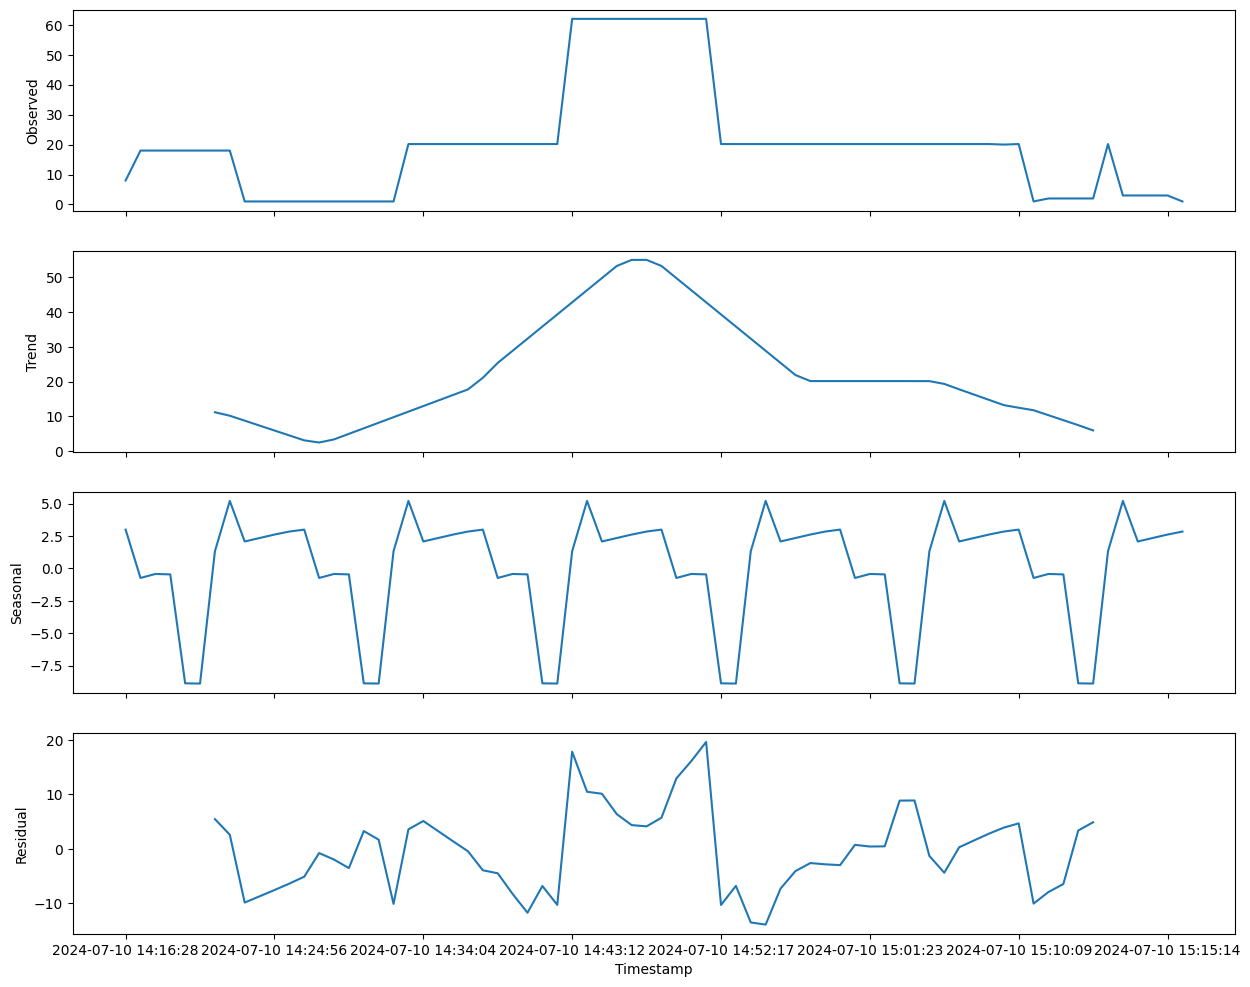

In [353]:
result_144p = decompose_time_series(df_144p_filtered, 'DL_bitrate', "144p", period=12)

ConversionError: Failed to convert value(s) to axis units: Index(['2024-07-11 22:53:36', '2024-07-11 22:58:49', '2024-07-11 23:04:02',
       '2024-07-11 23:09:15', '2024-07-11 23:14:28', '2024-07-11 23:19:41',
       '2024-07-11 23:24:54', '2024-07-11 23:30:07', '2024-07-11 23:35:20',
       '2024-07-11 23:40:33', '2024-07-11 23:45:46'],
      dtype='object', name='Timestamp')

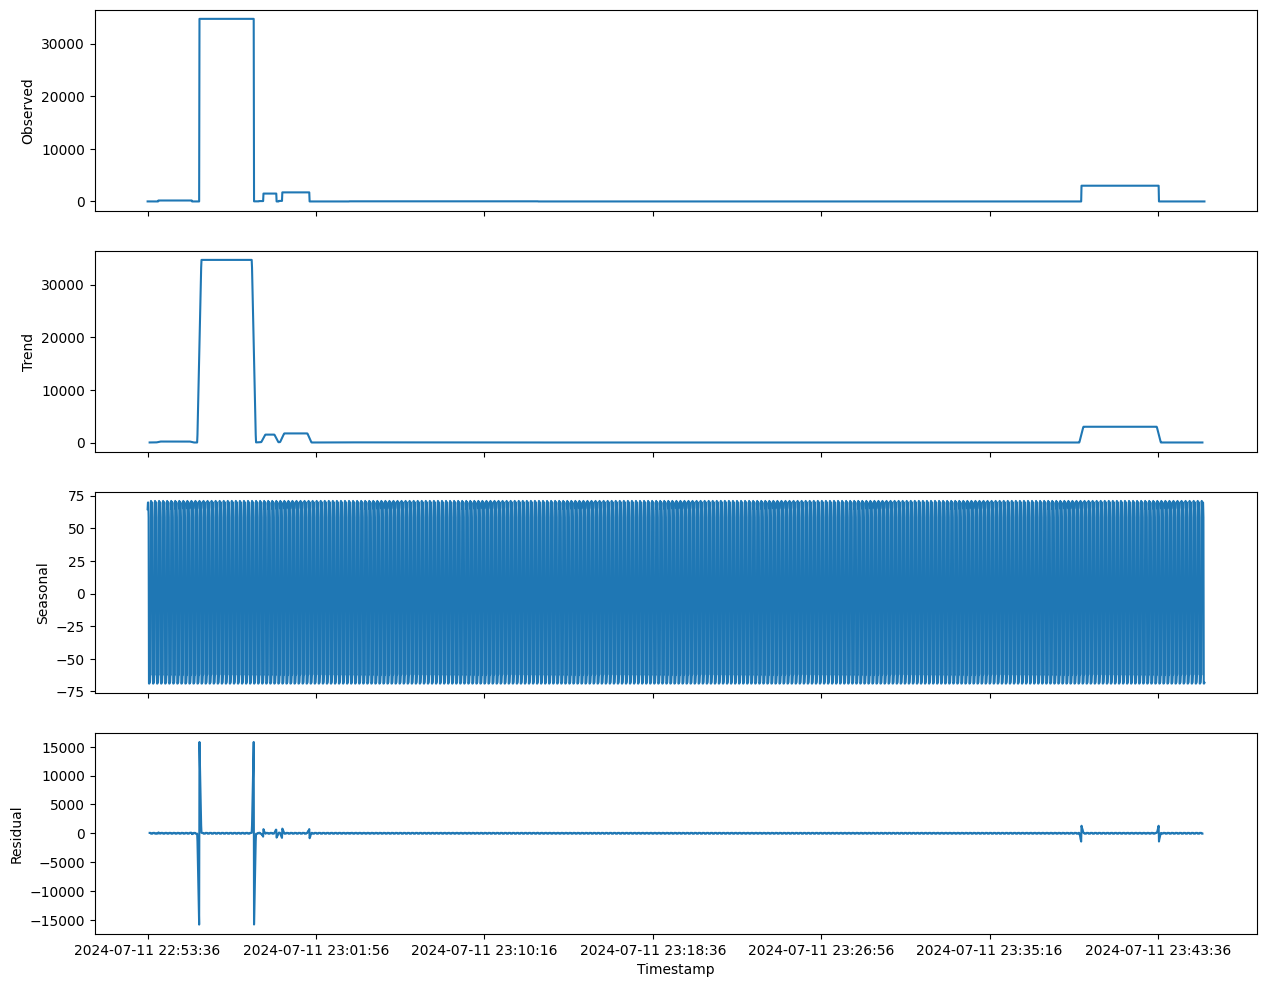

In [ ]:
result_360p = decompose_time_series(df_360p_filtered, 'DL_bitrate', "360p", period=12)

ConversionError: Failed to convert value(s) to axis units: Index(['2024-07-12 09:05:07', '2024-07-12 09:11:44', '2024-07-12 09:18:21',
       '2024-07-12 09:24:58', '2024-07-12 09:31:35', '2024-07-12 09:38:12',
       '2024-07-12 09:44:49', '2024-07-12 09:51:26', '2024-07-12 09:58:03',
       '2024-07-12 10:04:40', '2024-07-12 10:11:17'],
      dtype='object', name='Timestamp')

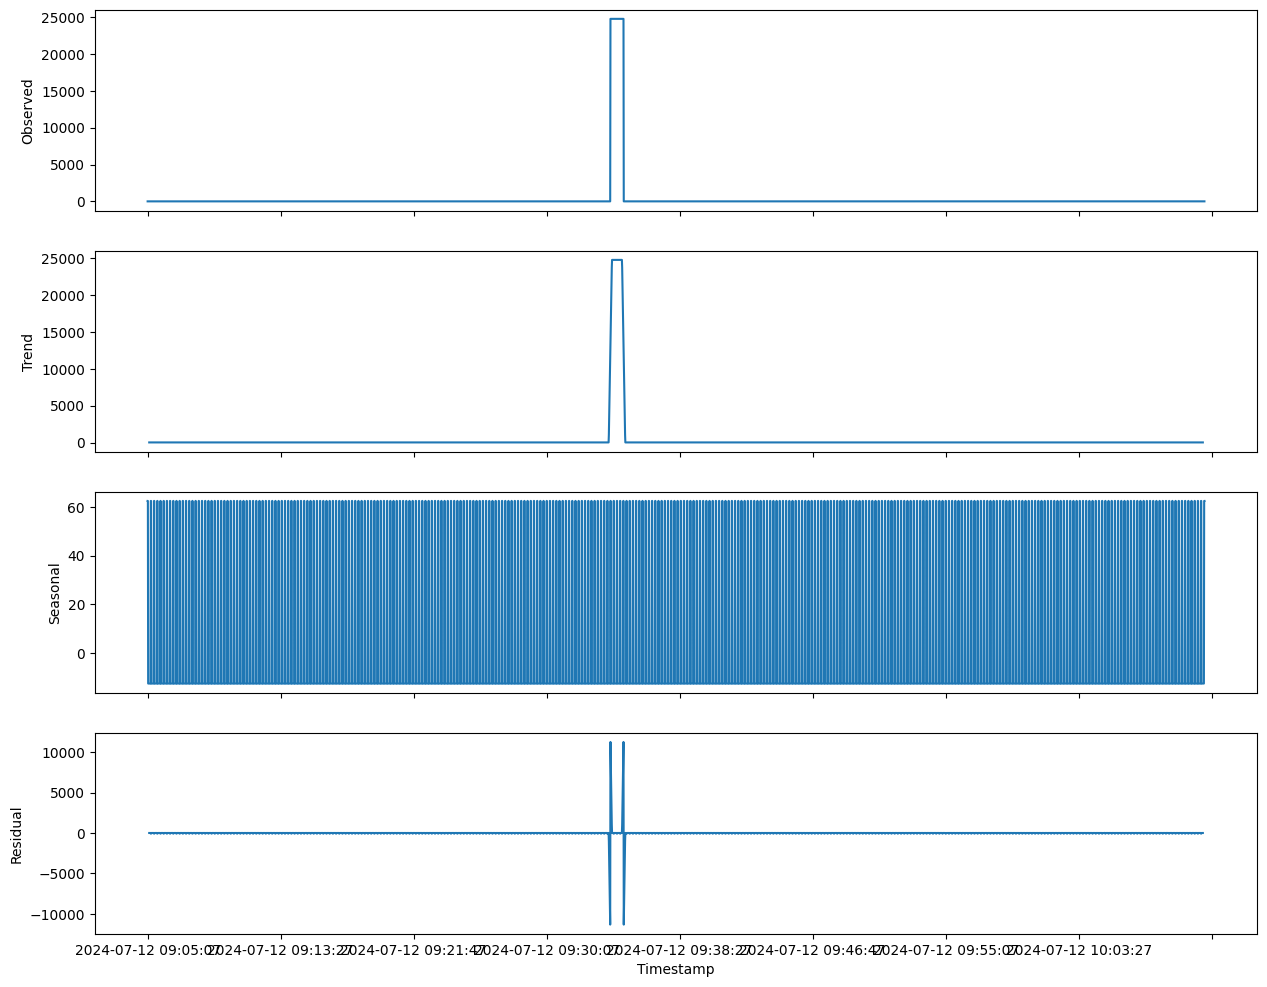

In [ ]:
result_360p = decompose_time_series(df_1080p_filtered, 'DL_bitrate', "1080p", period=12)

In [354]:
df_144p_filtered.columns

Index(['Timestamp', 'Longitude', 'Latitude', 'Speed', 'Operatorname',
       'Operator', 'CGI', 'Cellname', 'Node', 'CellID',
       ...
       'NCellid18', 'NLAC18', 'NCell18', 'NARFCN18', 'NRxLev18', 'NQual18',
       'NDistance18', 'NBearing18', 'Unnamed: 270', 'TimeDiff'],
      dtype='object', length=272)

### Treino dos Mdelos Arima, Sarima 

In [355]:
def split_data(data):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    return train, test

In [356]:
train_144p, test_144p = split_data(df_144p_filtered)
train_360p, test_360p = split_data(df_360p_filtered)
train_1080p, test_1080p = split_data(df_1080p_filtered)

In [357]:
# Previsão com Média Histórica
def forecast_historical_mean(train, test):
    mean_value = train.mean()
    forecast = np.full(len(test), mean_value)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    return forecast, rmse




In [358]:
# Prever usando Média Histórica
forecast_mean_144p, rmse_mean_144p = forecast_historical_mean(train_144p['DL_bitrate'], test_144p['DL_bitrate'])
forecast_mean_360p, rmse_mean_360p = forecast_historical_mean(train_360p['DL_bitrate'], test_360p['DL_bitrate'])
forecast_mean_1080p, rmse_mean_1080p = forecast_historical_mean(train_1080p['DL_bitrate'], test_1080p['DL_bitrate'])


In [359]:
print(f'144p - Historical Mean RMSE: {rmse_mean_144p}')
print(f'360p - Historical Mean RMSE: {rmse_mean_360p}')
print(f'1080p - Historical Mean RMSE: {rmse_mean_1080p}')

144p - Historical Mean RMSE: 17.362779479824212
360p - Historical Mean RMSE: 2115.0532712446
1080p - Historical Mean RMSE: 576.0917133335497


In [360]:
def forecast_naive_seasonal(train, test, season_length):
    forecast = np.tile(train[-season_length:], int(np.ceil(len(test) / season_length)))[:len(test)]
    rmse = np.sqrt(mean_squared_error(test, forecast))
    return forecast, rmse

In [361]:
season_length = 12  # Supondo sazonalidade mensal
forecast_naive_144p, rmse_naive_144p = forecast_naive_seasonal(train_144p['DL_bitrate'], test_144p['DL_bitrate'], season_length)
forecast_naive_360p, rmse_naive_360p = forecast_naive_seasonal(train_360p['DL_bitrate'], test_360p['DL_bitrate'], season_length)
forecast_naive_1080p, rmse_naive_1080p = forecast_naive_seasonal(train_1080p['DL_bitrate'], test_1080p['DL_bitrate'], season_length)

In [362]:
print(f'144p - Naive Seasonal Forecast RMSE: {rmse_naive_144p}')
print(f'360p - Naive Seasonal Forecast RMSE: {rmse_naive_360p}')
print(f'1080p - Naive Seasonal Forecast RMSE: {rmse_naive_1080p}')

144p - Naive Seasonal Forecast RMSE: 14.689308753874933
360p - Naive Seasonal Forecast RMSE: 1813.7055801268264
1080p - Naive Seasonal Forecast RMSE: 532.6264396386924


In [363]:
def forecast_last_value(train, test):
    last_value = train.iloc[-1]
    forecast = np.full(len(test), last_value)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    return forecast, rmse


In [364]:
forecast_last_144p, rmse_last_144p = forecast_last_value(train_144p['DL_bitrate'], test_144p['DL_bitrate'])
forecast_last_360p, rmse_last_360p = forecast_last_value(train_360p['DL_bitrate'], test_360p['DL_bitrate'])
forecast_last_1080p, rmse_last_1080p = forecast_last_value(train_1080p['DL_bitrate'], test_1080p['DL_bitrate'])

In [365]:
print(f'144p - Last Known Value RMSE: {rmse_last_144p}')
print(f'360p - Last Known Value RMSE: {rmse_last_360p}')
print(f'1080p - Last Known Value RMSE: {rmse_last_1080p}')

144p - Last Known Value RMSE: 14.689308753874933
360p - Last Known Value RMSE: 1813.7055801268264
1080p - Last Known Value RMSE: 532.6264396386924


In [366]:
def plot_results(train, test, forecast, title):
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Treino')
    plt.plot(test.index, test, label='Teste')
    plt.plot(test.index, forecast, label='Previsão')
    plt.xlabel('Timestamp')
    plt.ylabel('DL_bitrate')
    plt.title(title)
    plt.legend()
    plt.show()

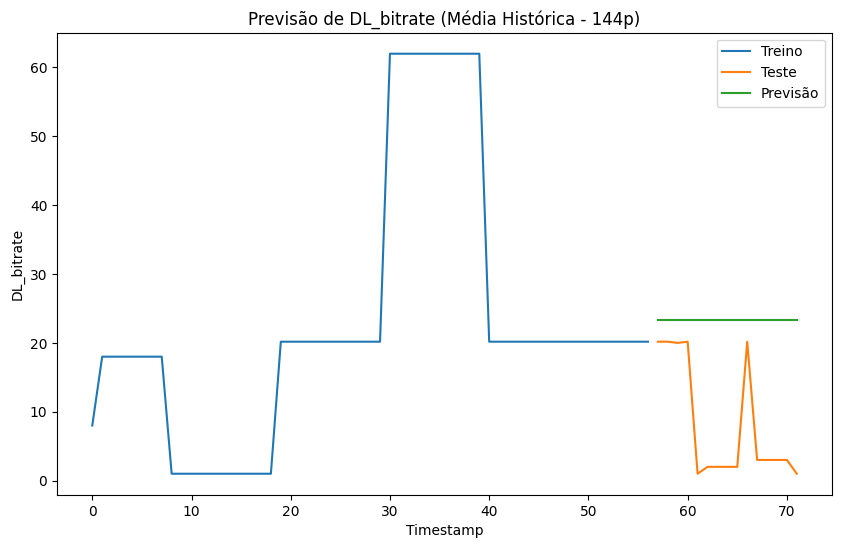

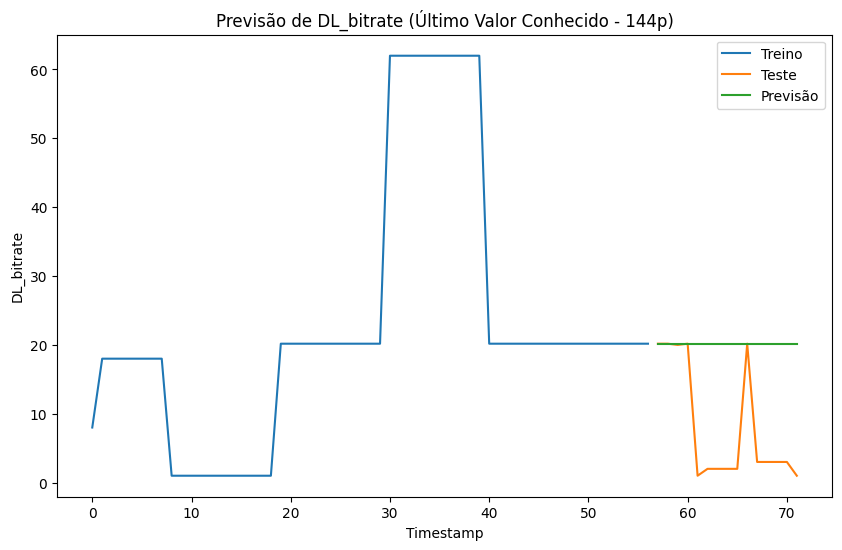

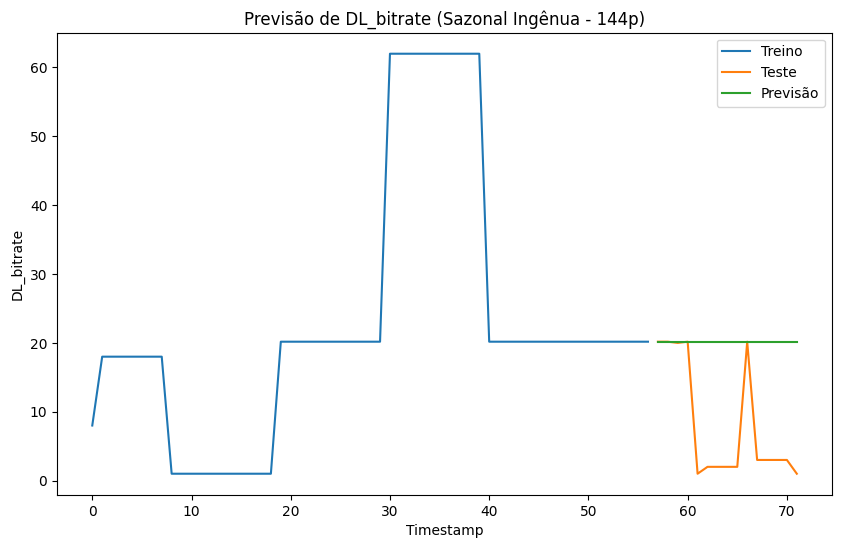

In [367]:
# Plotar os resultados para 144p
plot_results(train_144p['DL_bitrate'], test_144p['DL_bitrate'], forecast_mean_144p, 'Previsão de DL_bitrate (Média Histórica - 144p)')
plot_results(train_144p['DL_bitrate'], test_144p['DL_bitrate'], forecast_last_144p, 'Previsão de DL_bitrate (Último Valor Conhecido - 144p)')
plot_results(train_144p['DL_bitrate'], test_144p['DL_bitrate'], forecast_naive_144p, 'Previsão de DL_bitrate (Sazonal Ingênua - 144p)')


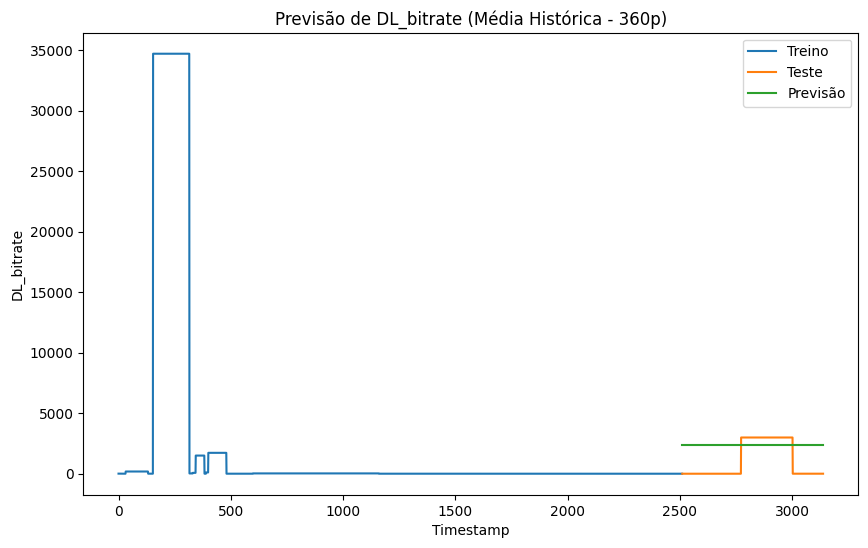

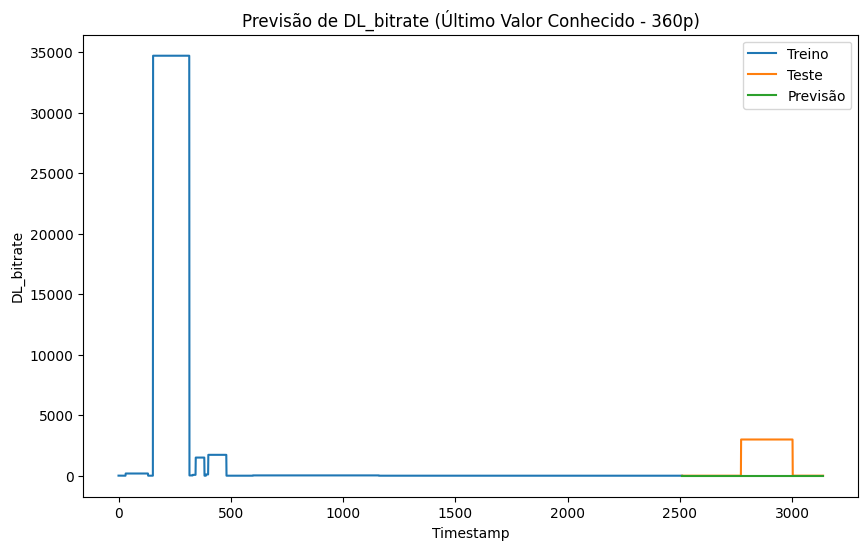

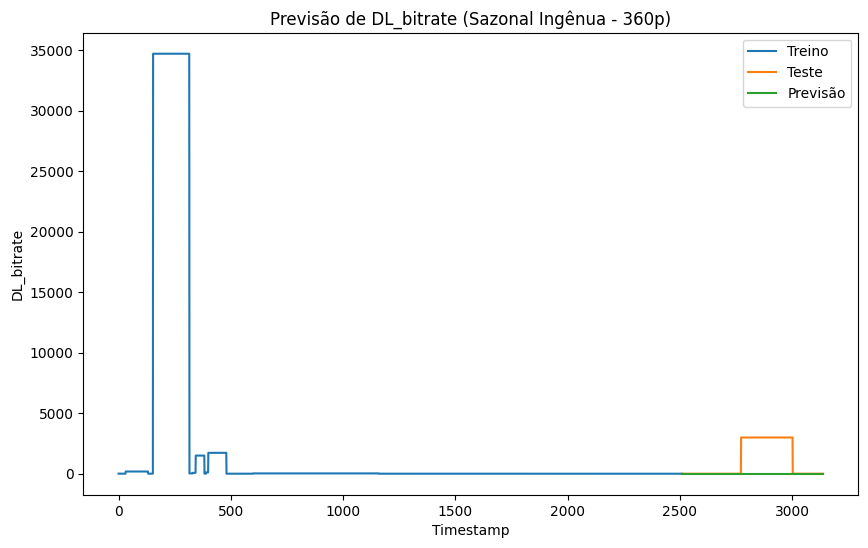

In [ ]:
# Plotar os resultados para 360p
plot_results(train_360p['DL_bitrate'], test_360p['DL_bitrate'], forecast_mean_360p, 'Previsão de DL_bitrate (Média Histórica - 360p)')
plot_results(train_360p['DL_bitrate'], test_360p['DL_bitrate'], forecast_last_360p, 'Previsão de DL_bitrate (Último Valor Conhecido - 360p)')
plot_results(train_360p['DL_bitrate'], test_360p['DL_bitrate'], forecast_naive_360p, 'Previsão de DL_bitrate (Sazonal Ingênua - 360p)')


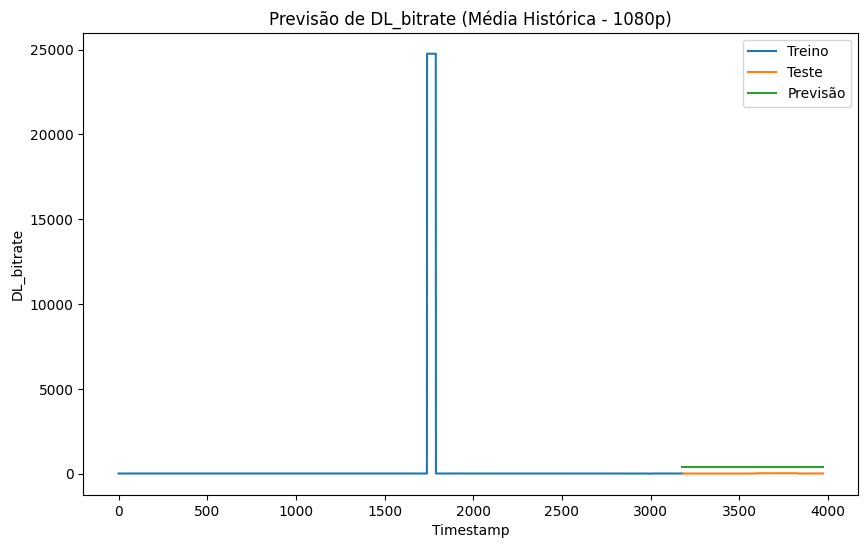

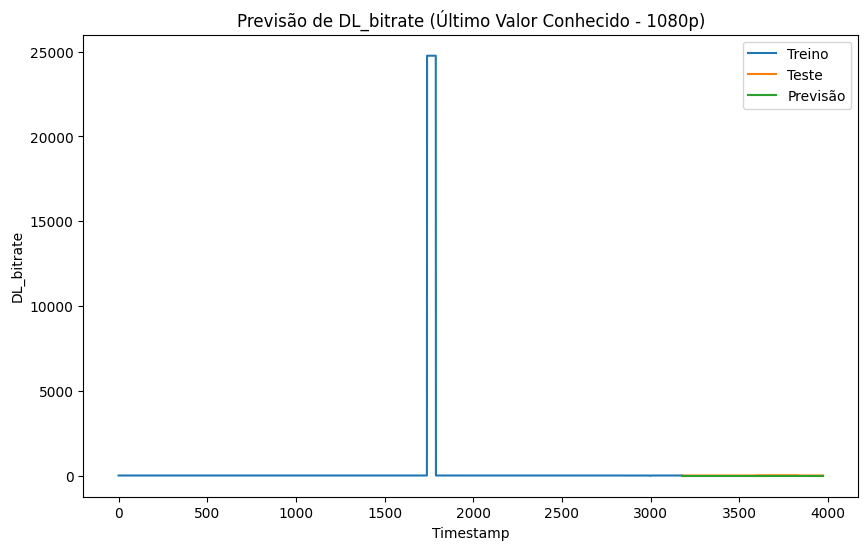

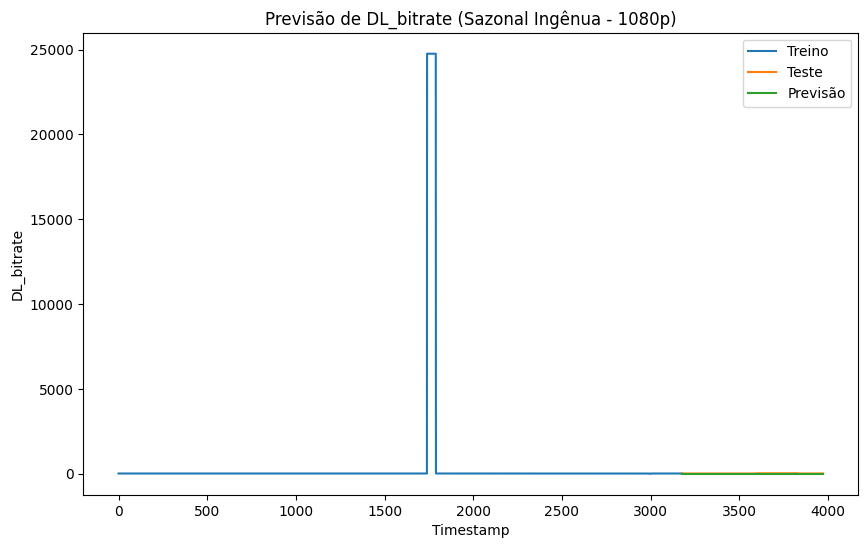

In [ ]:
# Plotar os resultados para 1080p
plot_results(train_1080p['DL_bitrate'], test_1080p['DL_bitrate'], forecast_mean_1080p, 'Previsão de DL_bitrate (Média Histórica - 1080p)')
plot_results(train_1080p['DL_bitrate'], test_1080p['DL_bitrate'], forecast_last_1080p, 'Previsão de DL_bitrate (Último Valor Conhecido - 1080p)')
plot_results(train_1080p['DL_bitrate'], test_1080p['DL_bitrate'], forecast_naive_1080p, 'Previsão de DL_bitrate (Sazonal Ingênua - 1080p)')